In [212]:
import pandas as pd

In [213]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

In [214]:
df_export=pd.read_csv(r'D:\Docs\coffee_data\exports-crop-year.csv')
df_domestic=pd.read_csv(r'D:\Docs\coffee_data\domestic-consumption.csv')
df_pdn=pd.read_csv(r'D:\Docs\coffee_data\total-production.csv')

In [215]:
cols=list(df_export.columns)[1:] # get columns that have names as years
##use melt function to turn data into a normalised format
df_exp = pd.melt(df_export, id_vars='exports_crop_year', value_vars=cols)
### we put column namws 
col_n=["Country","Year","Qty_Exported"]
df_exp.columns=col_n
df_exp.head()

,Country,Year,Qty_Exported
0,Angola,1990,79.3450
1,Bolivia (Plurinational State of),1990,111.9770
2,Brazil,1990,17862.6286
3,Burundi,1990,412.3930
4,Ecuador,1990,1627.7780


In [216]:
cols=list(df_domestic.columns)[1:] # same as above
##use melt function to turn data into a normalised format
df_dom = pd.melt(df_domestic, id_vars='domestic_consumption', value_vars=cols)
### we put column namws 
col_n=["Country","Year","Qty_Consumed"]
df_dom.columns=col_n
df_dom.head()

,Country,Year,Qty_Consumed
0,Angola,1990,20.0
1,Bolivia (Plurinational State of),1990,25.0
2,Brazil,1990,8200.0
3,Burundi,1990,2.0
4,Ecuador,1990,350.0


In [217]:
cols=list(df_pdn.columns)[1:] 
##use melt function to turn data into a normalised format
df_pro = pd.melt(df_pdn, id_vars='total_production', value_vars=cols)
### we put column namws 
col_n=["Country","Year","Qty_Produced"]
df_pro.columns=col_n
df_pro.head()

,Country,Year,Qty_Produced
0,Angola,1990,50.3450
1,Bolivia (Plurinational State of),1990,122.7770
2,Brazil,1990,27285.6286
3,Burundi,1990,487.3930
4,Ecuador,1990,1503.8150


In [218]:
data=df_exp.merge(df_dom,how='inner',on=['Country','Year'])
data

,Country,Year,Qty_Exported,Qty_Consumed
0,Angola,1990,79.3450,20.0
1,Bolivia (Plurinational State of),1990,111.9770,25.0
2,Brazil,1990,17862.6286,8200.0
3,Burundi,1990,412.3930,2.0
4,Ecuador,1990,1627.7780,350.0
...,...,...,...,...
1619,Trinidad & Tobago,2018,2.3647,10.0
1620,Uganda,2018,4453.9640,250.0
1621,Venezuela,2018,0.2602,1550.0
1622,Viet Nam,2018,26474.0742,2700.0


In [219]:
data=data.merge(df_pro,how='inner',on=['Country','Year'])
data

,Country,Year,Qty_Exported,Qty_Consumed,Qty_Produced
0,Angola,1990,79.3450,20.0,50.3450
1,Bolivia (Plurinational State of),1990,111.9770,25.0,122.7770
2,Brazil,1990,17862.6286,8200.0,27285.6286
3,Burundi,1990,412.3930,2.0,487.3930
4,Ecuador,1990,1627.7780,350.0,1503.8150
...,...,...,...,...,...
1619,Trinidad & Tobago,2018,2.3647,10.0,12.3647
1620,Uganda,2018,4453.9640,250.0,4703.9640
1621,Venezuela,2018,0.2602,1550.0,525.2602
1622,Viet Nam,2018,26474.0742,2700.0,31174.0742


In [220]:
##east africa
east=['Uganda','Kenya','Tanzania','Rwanda','Ethiopia']
east_df=[]
for c in east:
    #put name
    #name='df_'+c
    #print(name)  
    east_df.append(data[(data['Country']==c)])  

In [221]:
east_df[0].head(2)

,Country,Year,Qty_Exported,Qty_Consumed,Qty_Produced
52,Uganda,1990,2085.009,70.0,1955.009
108,Uganda,1991,2013.001,75.0,2088.001


In [222]:
##east africa
east=['Uganda','Kenya','Tanzania','Rwanda','Ethiopia']
east_df=[]
for c in east:
    #put name
    #name='df_'+c
    #print(name)  
    east_df.append(data[(data['Country']==c)])  

In [223]:
def get_color(c):
        switcher={
                'Uganda':'red',
                'Tanzania':'green',
                'Rwanda':'blue',
                'Kenya':'orange',
                'Ethiopia':'Purple'
                
             }
        return switcher.get(c)

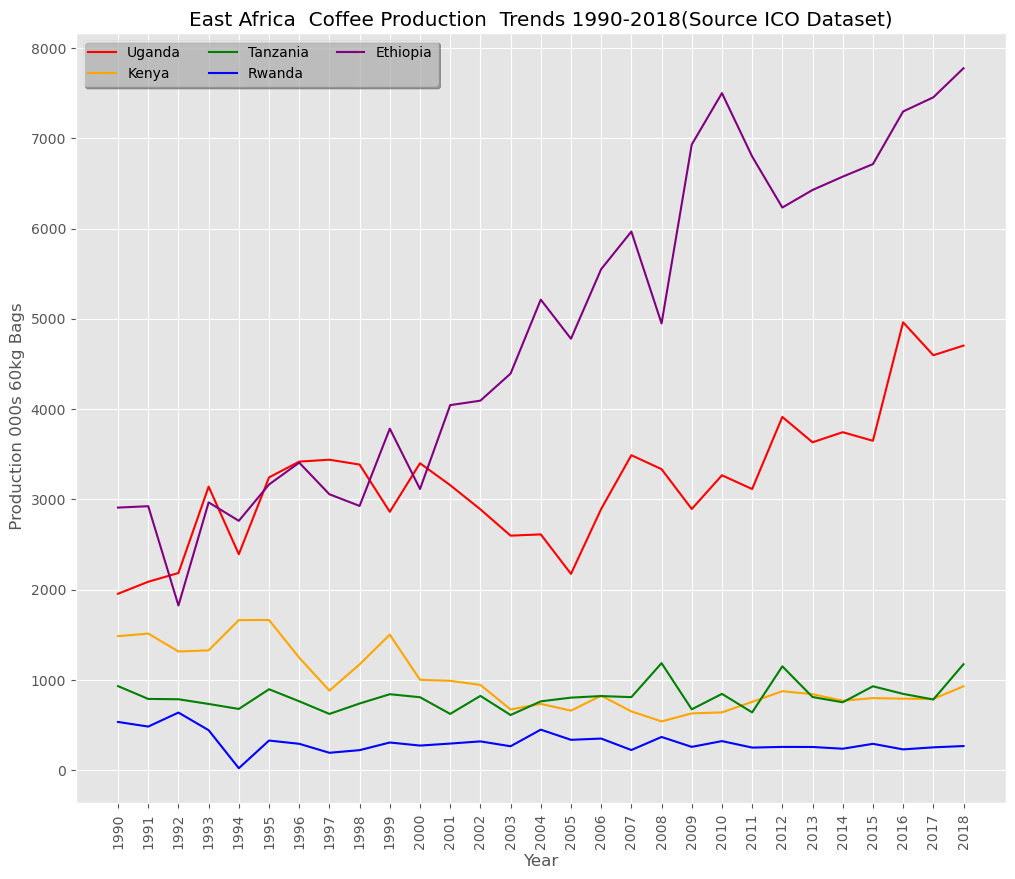

In [224]:
plt.figure(figsize=(12,10))
for i in range(0,len(east_df)):
    plt.plot(east_df[i]['Year'],east_df[i]['Qty_Produced'],c= get_color(east[i]),label=east[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('East Africa  Coffee Production  Trends 1990-2018(Source ICO Dataset)')
    plt.xlabel("Year")
    plt.ylabel(" Production 000s 60kg Bags")
    plt.xticks(rotation=90)
    leg.get_frame().set_alpha(0.5)
    plt.savefig(r'D:\Workings\east_coffeeexports.png',dpi=300,transparent=False)

In [225]:
##top 5 coffee producing countries
top_c=['Brazil','Viet Nam','Colombia','Indonesia','Honduras']
top_c_df=[]
for c in top_c:
    #put name
    #name='df_'+c
    #print(name)  
    top_c_df.append(data[(data['Country']==c)])  

In [226]:
def get_color_t(c):
        switcher={
                'Brazil':'Red',
                'Viet Nam':'green',
                'Colombia':'blue',
                'Indonesia':'orange',
                'Honduras':'Purple'
                
             }
        return switcher.get(c)

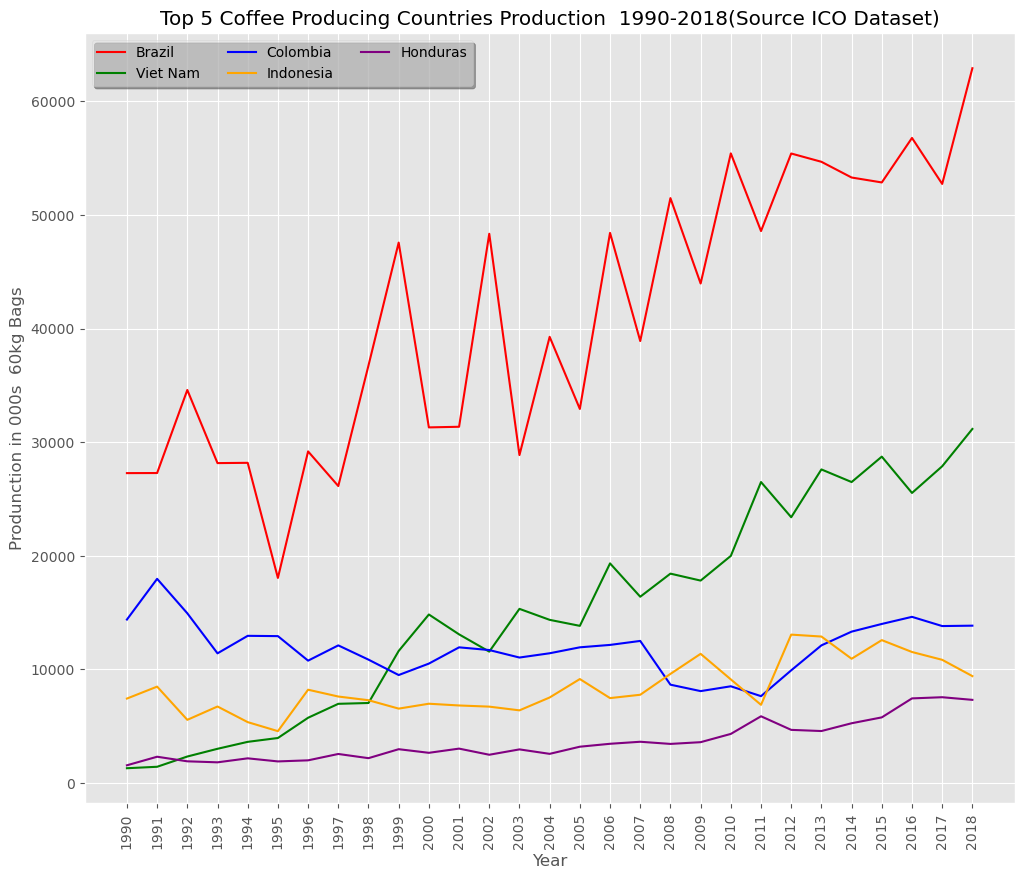

In [227]:
plt.figure(figsize=(12,10))
for i in range(0,len(top_c_df)):
    plt.plot(top_c_df[i]['Year'],top_c_df[i]['Qty_Produced'],c= get_color_t(top_c[i]),label=top_c[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('Top 5 Coffee Producing Countries Production  1990-2018(Source ICO Dataset)')
    plt.xlabel("Year")
    plt.ylabel("Produnction in 000s  60kg Bags")
    plt.xticks(rotation=90)
    leg.get_frame().set_alpha(0.5)
    plt.savefig(r'D:\Workings\top_pdn.png',dpi=300,transparent=False)

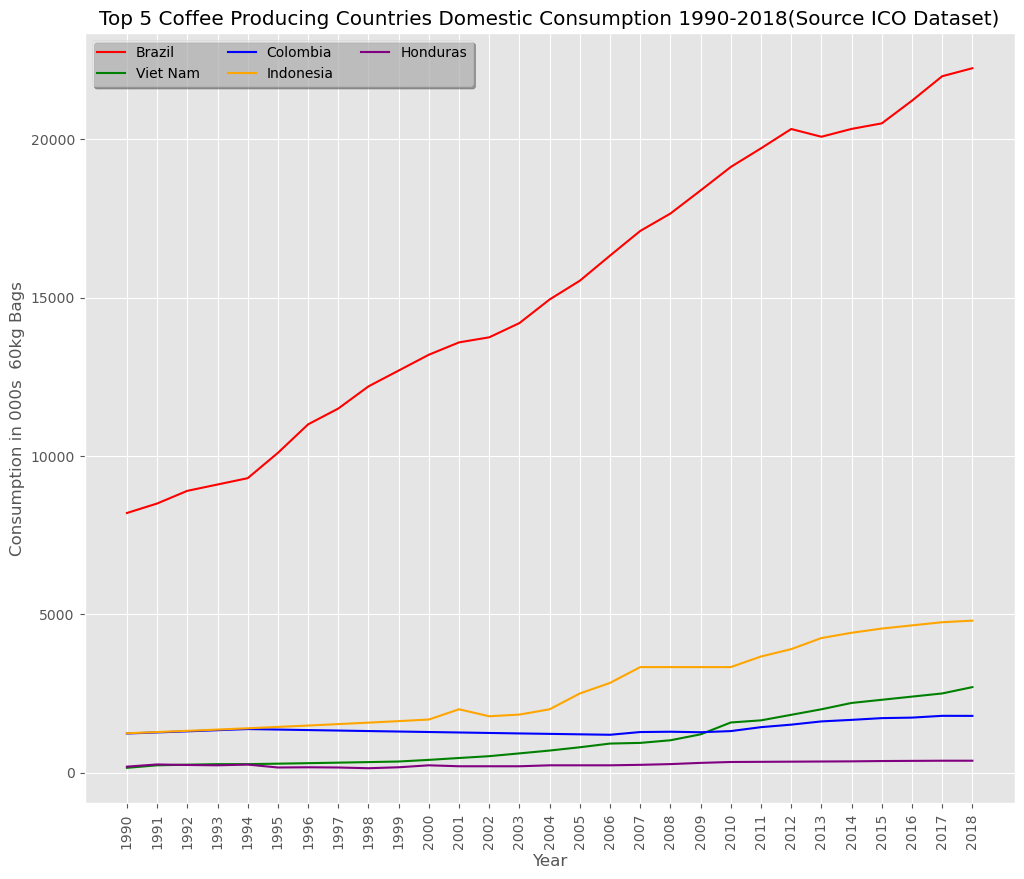

In [228]:
plt.figure(figsize=(12,10))
for i in range(0,len(top_c_df)):
    plt.plot(top_c_df[i]['Year'],top_c_df[i]['Qty_Consumed'],c= get_color_t(top_c[i]),label=top_c[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('Top 5 Coffee Producing Countries Domestic Consumption 1990-2018(Source ICO Dataset)')
    plt.xlabel("Year")
    plt.ylabel("Consumption in 000s  60kg Bags")
    plt.xticks(rotation=90)
    leg.get_frame().set_alpha(0.5)
    plt.savefig(r'D:\Workings\top_co.png',dpi=300,transparent=False)

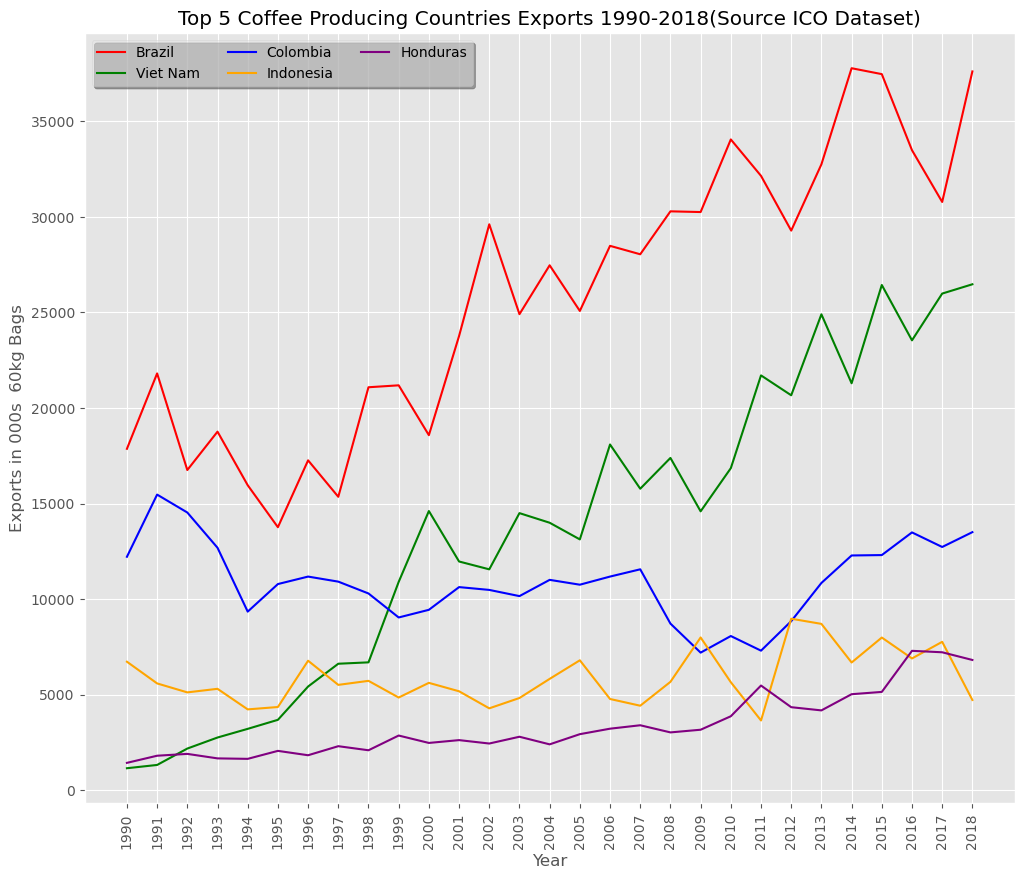

In [229]:
plt.figure(figsize=(12,10))
for i in range(0,len(top_c_df)):
    plt.plot(top_c_df[i]['Year'],top_c_df[i]['Qty_Exported'],c= get_color_t(top_c[i]),label=top_c[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('Top 5 Coffee Producing Countries Exports 1990-2018(Source ICO Dataset)')
    plt.xlabel("Year")
    plt.ylabel("Exports in 000s  60kg Bags")
    plt.xticks(rotation=90)
    leg.get_frame().set_alpha(0.5)
    plt.savefig(r'D:\Workings\top_exp.png',dpi=300,transparent=False)

In [230]:
top_c_df[0]

,Country,Year,Qty_Exported,Qty_Consumed,Qty_Produced
2,Brazil,1990,17862.6286,8200.0,27285.6286
58,Brazil,1991,21808.4934,8500.0,27293.4934
114,Brazil,1992,16752.3542,8900.0,34603.3542
170,Brazil,1993,18760.9786,9100.0,28166.9786
226,Brazil,1994,15958.0470,9300.0,28192.0470
282,Brazil,1995,13760.2022,10100.0,18060.2022
338,Brazil,1996,17259.7430,11000.0,29196.7430
394,Brazil,1997,15352.0040,11500.0,26148.0040
450,Brazil,1998,21084.8533,12200.0,36760.8533
506,Brazil,1999,21185.8065,12700.0,47577.8065


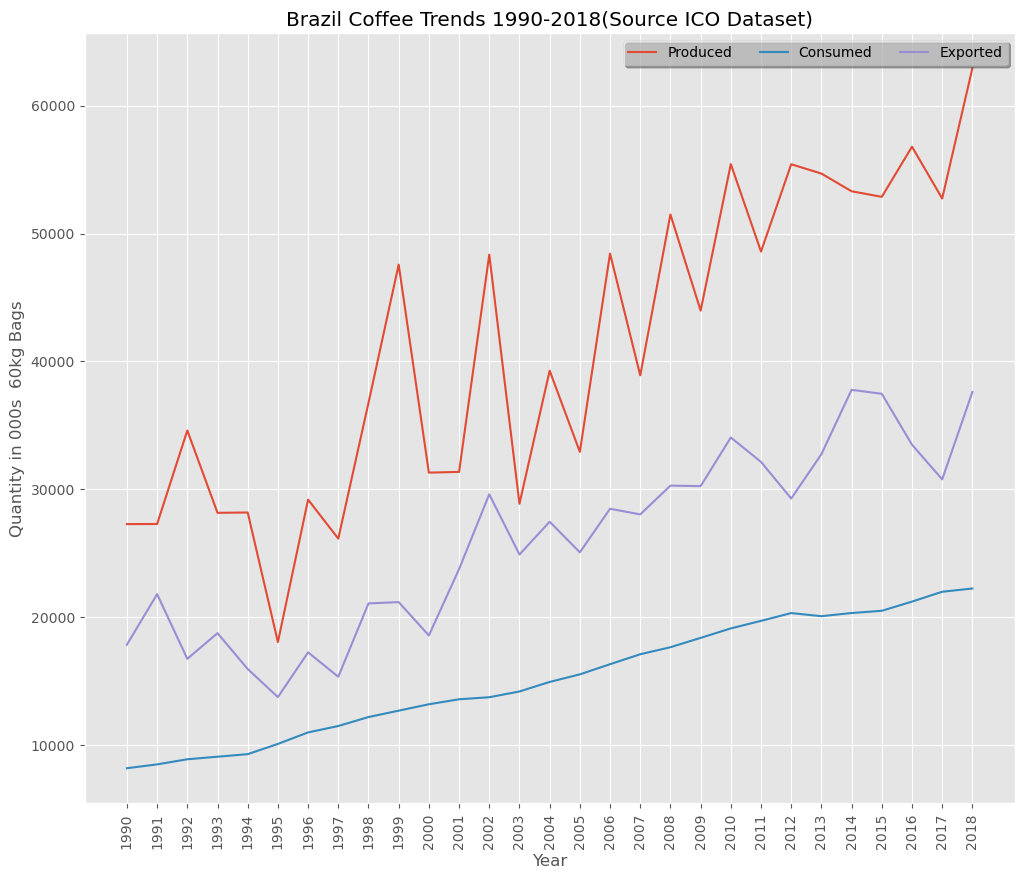

In [231]:
plt.figure(figsize=(12,10))
plt.plot(top_c_df[0]['Year'],top_c_df[0][['Qty_Produced','Qty_Consumed','Qty_Exported']],label=['Produced','Consumed','Exported'])
leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
plt.title('Brazil Coffee Trends 1990-2018(Source ICO Dataset)')
plt.xlabel("Year")
plt.ylabel("Quantity in 000s  60kg Bags")
plt.xticks(rotation=90)
leg.get_frame().set_alpha(0.5)
plt.savefig(r'D:\Workings\brazil.png',dpi=300,transparent=False)